In [1]:
import petlink32
import numpy as np
import time

In [2]:
time_a = time.time()

In [3]:
packets = [petlink32.EVENT, 
               petlink32.PROMPT, 
               petlink32.BIN_ADDRESS, 
               petlink32.TIME_TAG, 
               petlink32.MOTION_TAG, 
               petlink32.MONITORING_TAG,
               petlink32.CONTROL_TAG]
packet_names = ["event", "prompt", "bin address", "timetag", "motion", "monitoring", "control"]
for pair in zip(packet_names, packets):
    print(pair)

('event', packet part
low bit = 31
high bit = 31
value = 0 (base 2)
mask = 10000000000000000000000000000000)
('prompt', packet part
low bit = 30
high bit = 30
value = 1 (base 2)
mask = 1000000000000000000000000000000)
('bin address', packet part
low bit = 0
high bit = 29
mask = 111111111111111111111111111111)
('timetag', packet part
low bit = 30
high bit = 31
value = 10 (base 2)
mask = 11000000000000000000000000000000)
('motion', packet part
low bit = 29
high bit = 31
value = 110 (base 2)
mask = 11100000000000000000000000000000)
('monitoring', packet part
low bit = 28
high bit = 31
value = 1110 (base 2)
mask = 11110000000000000000000000000000)
('control', packet part
low bit = 28
high bit = 31
value = 1111 (base 2)
mask = 11110000000000000000000000000000)


In [4]:
listmode_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00.l"
listmode_path = r"C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00.l"
with open(listmode_path, 'rb') as file:
    listmode_data = np.fromfile(file, dtype = np.uint32)
N = len(listmode_data)
print("number of packets in data = {}".format(N))

number of packets in data = 16866873


In [5]:
is_event = petlink32.EVENT.compare(listmode_data)
event_count = np.sum(is_event)
is_prompt = petlink32.PROMPT.compare(listmode_data[is_event])
prompt_count = np.sum(is_prompt)
print("event count {}\nprompt count {}\n".format(event_count, prompt_count))

event count 16804277
prompt count 14688186



In [6]:
is_timetag = petlink32.TIME_TAG.compare(listmode_data)
timetag_count = np.sum(is_timetag)
is_motion = petlink32.MOTION_TAG.compare(listmode_data)
motion_count = np.sum(is_motion)
is_monitoring = petlink32.MONITORING_TAG.compare(listmode_data)
monitoring_count = np.sum(is_monitoring)
is_control = petlink32.CONTROL_TAG.compare(listmode_data)
control_count = np.sum(is_control)
tag_labels = ['timetag', 'motion', 'monitoring', 'control']
tag_counts = [timetag_count, motion_count, monitoring_count, control_count]

print("counts")
for pair in zip(tag_labels, tag_counts):
    print(pair)

counts
('timetag', 61441)
('motion', 1154)
('monitoring', 0)
('control', 1)


In [7]:
part_sum = sum(tag_counts) + event_count
print("diff counts and length = {}".format(N-part_sum))

diff counts and length = 0


In [8]:
#test motion
listmode_motion = listmode_data[is_motion]
is_horizontal = petlink32.IS_HORIZONTAL_BED.compare(listmode_motion)
horizontal_count = np.sum(is_horizontal)
is_vertical = petlink32.IS_VERTICAL_BED.compare(listmode_motion)
vertical_count = np.sum(is_vertical)
motion_diff = motion_count - vertical_count - horizontal_count
print("vertical count = {}\nhorizontal count = {}".format(vertical_count, horizontal_count))
print("motion outliers (not vertical or horizontal) = {}".format(motion_diff))

vertical count = 0
horizontal count = 1154
motion outliers (not vertical or horizontal) = 0


In [9]:
time_b = time.time()
print("elapsed time = {}".format(time_b-time_a))

elapsed time = 0.893608808517456


In [10]:
import matplotlib.pyplot as plt

In [11]:
def twos_complement(input_value, num_bits):
    """Calculates a two's complement integer from the given input value's bits."""
    mask = 2 ** (num_bits - 1)
    return -(input_value & mask) + (input_value & ~mask)

In [12]:
listmode_horizontal = listmode_motion[is_horizontal]
raw_horizontal_values = petlink32.HORIZONTAL_BED_POSITION.evaluate(listmode_horizontal)
horizontal_values = twos_complement(raw_horizontal_values, num_bits=19+1)

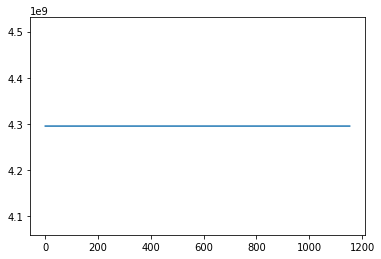

In [13]:
plt.plot(horizontal_values)

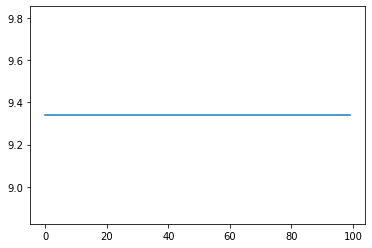

In [14]:
plt.plot(raw_horizontal_values[:100]/(100*1000))

In [15]:
print(raw_horizontal_values[:100])

[933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972
 933972 933972 933972 933972 933972 933972 933972 933972 933972 933972]


[114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604
 114604 114604 114604 114604 114604 114604 114604 114604 114604 114604]


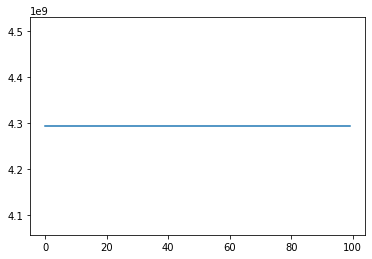

In [16]:
print(2**20-raw_horizontal_values[:100])
plt.plot((2*20) - raw_horizontal_values[:100])

In [17]:
print(0xfffff)
print(raw_horizontal_values[:10])
print(horizontal_values[:10])
print((2**20) - raw_horizontal_values[:10])

1048575
[933972 933972 933972 933972 933972 933972 933972 933972 933972 933972]
[4294852692 4294852692 4294852692 4294852692 4294852692 4294852692
 4294852692 4294852692 4294852692 4294852692]
[114604 114604 114604 114604 114604 114604 114604 114604 114604 114604]


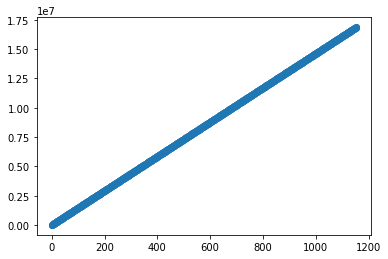

In [18]:
whe = np.nonzero(is_motion)[0]
n = len(whe)
plt.scatter(range(n), whe)

In [19]:
print(whe)
print(n)

[   13244    27818    42592 ... 16833869 16848211 16862810]
1154


In [20]:
print(np.min(raw_horizontal_values), np.max(raw_horizontal_values))

933972 933972


In [21]:
print(np.diff(whe))

[14574 14774 14926 ... 14582 14342 14599]


In [22]:
a = 10
np.sum(is_timetag[whe[a]:whe[a+1]])

52

In [23]:
is_moving = petlink32.IS_HORIZONTAL_MOVING.compare(listmode_motion)
print(np.sum(is_moving))

0


In [24]:
#time values
timetag_ms = petlink32.TIME_MS.evaluate(listmode_data[is_timetag])
print(timetag_ms)

[    0     1     2 ... 60011 60012 60013]


In [25]:
# control packet
place = np.nonzero(is_control)[0][0]
print("control packet \n{0:b}".format(listmode_data[place]))
print("at {}, between 0 and {}".format(place, N))
print("at time {} ms".format(np.sum(is_timetag[:place])))

control packet 
11111111111111110000000000000000
at 17955, between 0 and 16866873
at time 63 ms


In [26]:
# elapsed time packets, and not singles rate
is_time_marker = petlink32.ELAPSED_TIME_MARKER.compare(listmode_data)
time_marker_count = np.sum(is_time_marker)
time_diff = timetag_count - time_marker_count
print("diff in timetags and elapsed markers {}".format(time_diff))

diff in timetags and elapsed markers 1427


In [27]:
is_dead_time = petlink32.DEAD_TIME_MARKER.compare(listmode_data)
dt_count = np.sum(is_dead_time)
print("dead time count {}".format(dt_count))

dead time count 1427


In [28]:
dt_blocks = petlink32.DEAD_TIME_BLOCK.evaluate(listmode_data[is_dead_time])
print("dt blocks = {}".format(dt_blocks))

dt blocks = [896   0   1 ...  47 768 896]


In [29]:
print(0 & 1)

0


In [30]:
print( 1 ^ 1)
print(1 ^ 0)

0
1


In [31]:
print( 1 & 1)
print(0 & 0)

1
0


In [32]:
print(0b10+0b11)

5
